shape of image (512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

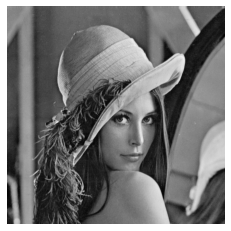

In [2]:

# 1. Download Lena color image convert it to grayscale image and add salt and  pepper noise with noise quantity 0.1,0.2 upto 1 and generate 10 noisy images.
#          a. Do average filtering ( by correlating with average filter ) of varying sizes for each image. Filter size can be 3*3, 5*5, 7*7. (In 3*3 filter all the values are 1/9, in 5*5 filter all the values are 1/25 and in 7*7 filter all the values are 1/49)
#          b. Similarly, repeat the question 1.a by replacing the average filter by median filter




#converting image to grayscale 

import cv2
from matplotlib import pyplot as plt
from skimage.util import random_noise
import numpy as np
from tqdm import tqdm



img = cv2.imread("Lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(f"shape of image {img.shape}")
plt.imshow(gray, cmap="gray")
plt.axis("off")




(-0.5, 511.5, 511.5, -0.5)

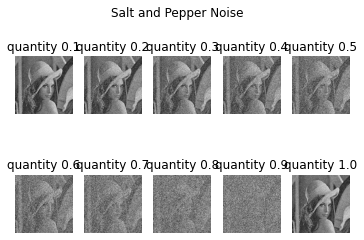

In [3]:
#salt and pepper noise


spnoise = []
for j in range(10):
    spnoise.append(random_noise(gray, mode='s&p',amount=(j+1)/10))
# print(spnoise)
plt.suptitle("Salt and Pepper Noise")
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(spnoise[i],cmap='gray')
    plt.axis("off")
    plt.title(f"quantity {(i+1)/10}")
#     plt.tight_layout()



plt.imshow(spnoise[0],cmap="gray")
plt.axis("off")

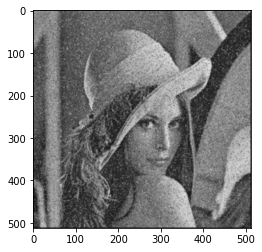

In [4]:
#average filer 


matrix3 = [[1/9]*3]*3
matrix3 =np.array(matrix3)
matrix5 = [[1/25]*5]*5
matrix5 =np.array(matrix5)
matrix7 = [[1/49]*7]*7
matrix7 =np.array(matrix7)



def avgFilter(matrix,quantity):
    temp_image = np.zeros(shape = [img.shape[0]+matrix.shape[0]-1,img.shape[1]+matrix.shape[1]-1,3], dtype=np.uint8)
    filtered_image = np.zeros(shape = [img.shape[0],img.shape[1],3], dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            temp_image[i+matrix.shape[0]-1][j+matrix.shape[1]-1] = spnoise[int((quantity-0.1)*10)][i][j]*255
            
    for x in range(temp_image.shape[0]-matrix.shape[0]):
        for y in range(temp_image.shape[1]-matrix.shape[1]):
            addition = 0
            for i in range(matrix.shape[0]):
                for j in range(matrix.shape[1]):
                    addition = addition + matrix[i][j]*temp_image[x+i][y+j]
            filtered_image[x][y] = addition
    plt.imshow(filtered_image)


avgFilter(matrix3,0.1)


100%|██████████| 511/511 [00:14<00:00, 35.22it/s]


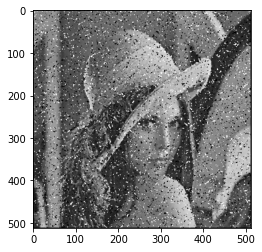

In [5]:
#  medianFilter 

matrix3 = [[1]*3]*3
matrix3 =np.array(matrix3)
matrix5 = [[1]*5]*5
matrix5 =np.array(matrix5)
matrix7 = [[1]*7]*7
matrix7 =np.array(matrix7)



def medianFilter(matrix,quantity):
    temp_image = np.zeros(shape = [img.shape[0]+matrix.shape[0]-1,img.shape[1]+matrix.shape[1]-1,3], dtype=np.uint8)
    filtered_image = np.zeros(shape = [img.shape[0],img.shape[1],3], dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            temp_image[i+matrix.shape[0]-1][j+matrix.shape[1]-1] = spnoise[int((quantity-0.1)*10)][i][j]*255
    
    for x in tqdm(range(temp_image.shape[0]-matrix.shape[0])):
        for y in range(temp_image.shape[1]-matrix.shape[1]):
            neighbour = []
            for i in range(matrix.shape[0]):
                for j in range(matrix.shape[1]):
                    neighbour.append(matrix[i][j]*temp_image[x+i][y+j])
            convert_neighbour = np.array(neighbour)
            filtered_image[x][y] = np.median(convert_neighbour)
            
    plt.imshow(filtered_image)


medianFilter(matrix3,0.5)
